# 데이터셋 출처
- https://www.kaggle.com/datasets/abubakarsiddiquemahi/heart-disease-dataset

## 데이터 구성
- HeartDisease: 심장병, 관상 동맥 심장 질환 혹은 심근 경색증이 있었는지 유무
- BMI: 체질량 지수
- Smoking: 흡연 여부 (일생 동안 100개비의 담배를 피웠는지의 유무)
- AlcoholDrinking: 음주 여부 (또는 과음자, 남성 기준 : 주당 14잔 이상, 여성 기준 : 주당 7잔 이상 음주)
- Stroke: 뇌졸중 발병 여부 (Yes: 발병, No: 미발병)
- PhysicalHealth: 신체 건강 상태 (신체적 질병과 부상을 포함하여 지난 30일 동안 건강이 좋지 않았던 날)
- MentalHealth: 정신 건강 상태 (정신건강을 생각해보아 지난 30일 동안 정신 건강이 좋지 않았던 날)
- DiffWalking: 걷기 어려움 정도 (걷거나 계단을 오를 때 어려움의 유무)
- Sex: 성별 (Male : 남성, Female: 여성)
- AgeCategory: 나이 범주(14개)
- Race: 인종 ('White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic')
- Diabetic: 당뇨병 여부 (Yes: 있음, No: 없음, No, borderline diabetes: 당뇨병 전단계, 'Yes: 임신 중 당뇨병 여부)
- PhysicalActivity: 신체 활동 (지난 30일 동안 일을 제외한 신체활동이나 운동 여부)
- GenHealth: 일반적인 건강 상태 (Poor, Fair, Very good, Excellent)
- SleepTime: 수면 시간 (평균 몇 시간의 수면을 취하는지)
- Asthma: 천식 발병 여부 (Yes: 발병, No: 미발병)
- KidneyDisease: 신장 질환 여부 (신장병, 신장결석, 방광염, 요실금 제외)
- SkinCancer: 피부암 발병 여부 (Yes:발병, No: 미발병)

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import math
rc('font', family='AppleGothic')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
heart_kaggle = pd.read_excel('ori_data/Heart Disease.xlsx')
heart_kaggle.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [3]:
df = heart_kaggle.copy()

In [6]:
df.info() # 머신러닝을 위한 인코딩 필요(object -> )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.isnull().sum() # 결측치 없음

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [114]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

- 범주형 : ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
'Sex', 'AgeCategory'(순서형), 'Race', 'Diabetic', 'PhysicalActivity',
'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
- 연속형 : BMI, PhysicalHealth, MentalHealth, SleepTime

# 시각화
## HeartDisease VS Feature

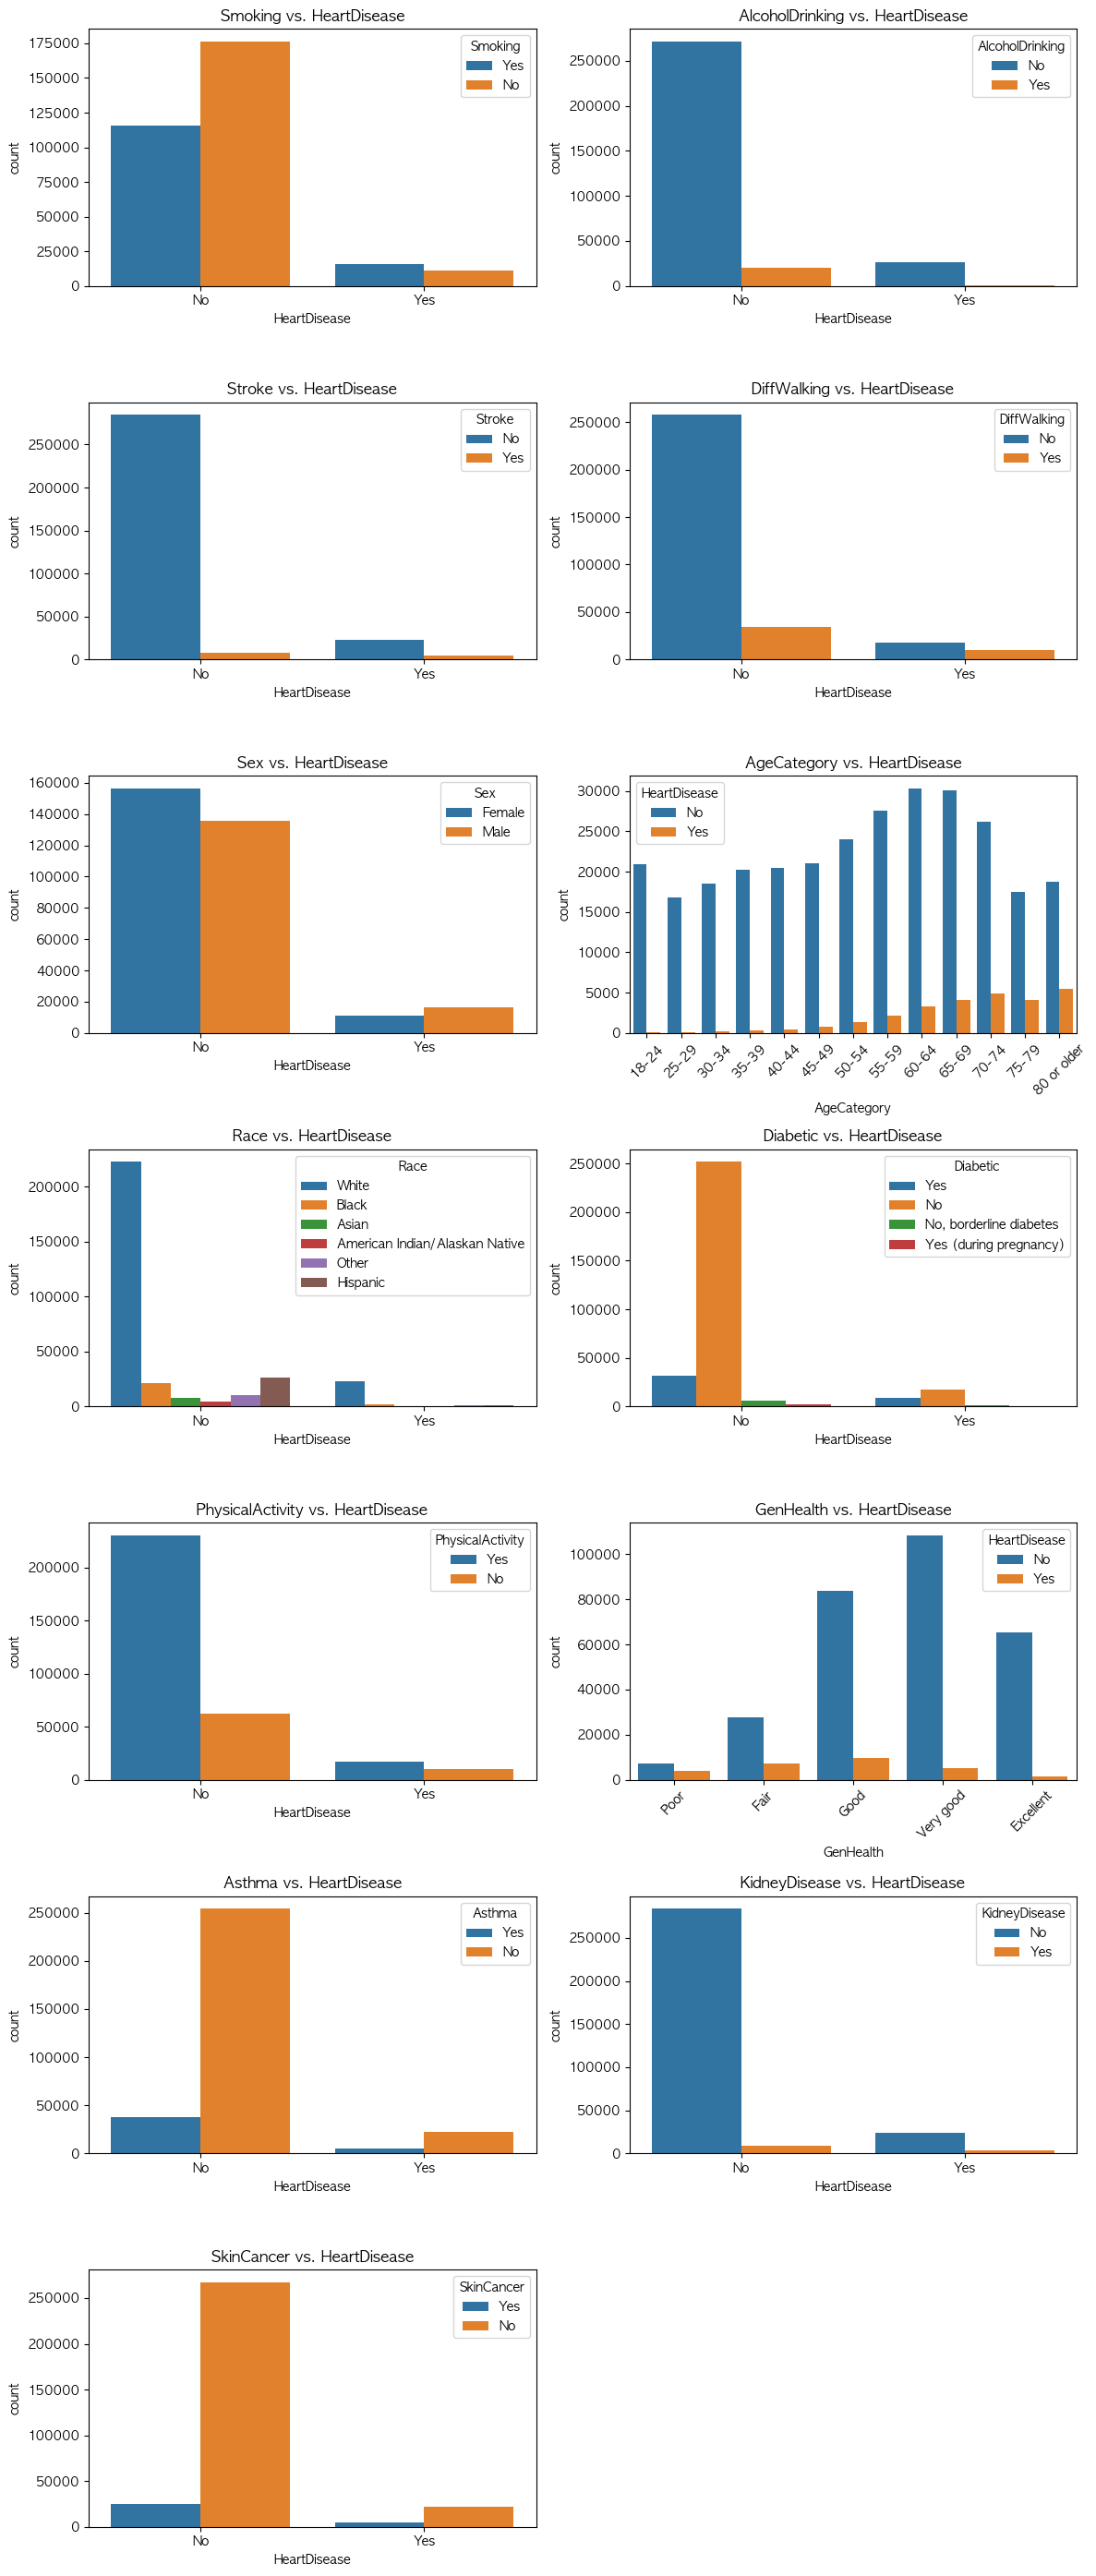

In [112]:
# 범주형 컬럼 모두 가져오기
columns = df.select_dtypes(include=['object']).columns.tolist()
columns = columns[1:]  # 첫 번째 열은 'HeartDisease' 이므로 제외합니다.

# subplot의 개수를 계산
num_plots = len(columns)

# 행과 열의 개수를 계산 (예: 3개의 범주형 열 -> 2x2 그리드)
cols = 2  # 열의 개수 (조정 가능)
rows = (num_plots + cols - 1) // cols

# 그리드를 생성하고 그림의 세로 크기 확장
fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))

# 범주형 열을 순회하면서 subplot에 카운트 플롯 그리기
for i, column in enumerate(columns):
    if column == 'HeartDisease':  # 'HeartDisease'와 'Race' 열은 제외
        continue
    row = i // cols  # 행 인덱스 계산
    col = i % cols   # 열 인덱스 계산
    ax = axes[row, col]  # 현재 subplot을 선택
    
    if column == 'GenHealth' or column == 'AgeCategory':
        if column == 'GenHealth':
            custom_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
        elif column == 'AgeCategory':
            custom_order = sorted(df['AgeCategory'].unique())
        sns.countplot(data=df, x=column, hue='HeartDisease', ax=ax, order=custom_order)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # 겹침으로 인한 각도 변경
    else:
        sns.countplot(data=df, x='HeartDisease', hue=column, ax=ax)
    
    ax.set_title(f'{column} vs. HeartDisease')  # subplot 제목 설정

# 나머지 subplot을 숨김
for i in range(num_plots, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # subplot 간의 간격을 조절하여 레이아웃을 보정
plt.show()


- HeartDisease 컬럼은 데이터 불균형은 매우 심함

<Axes: >

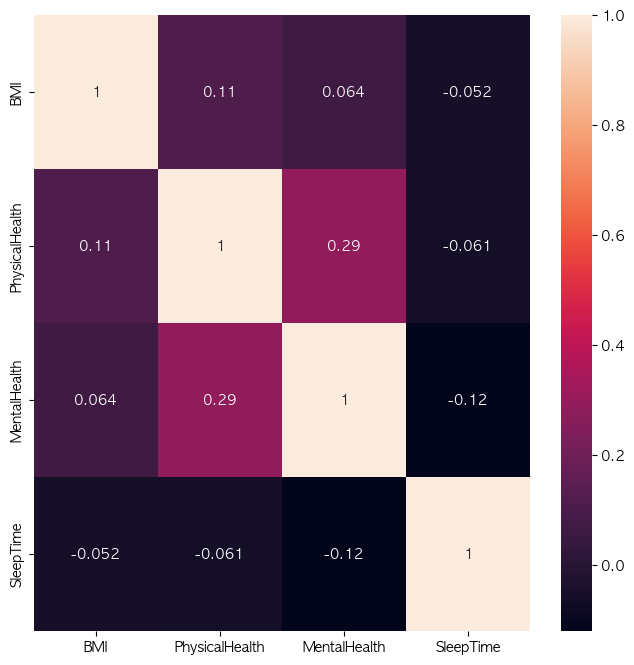

In [115]:
# 수치형 데이터 상관관계 분석
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,8))
sns.heatmap(numeric_columns.corr(),annot=True)

- 양의 상관관계 : 서로 비례
- 음의 상관관게 : 서로 반비례
- -0.12 ~ 0.11 사이의 값을 보이며 유의미한 값을 보이진 않음

In [139]:
def kde(feature):
    facet=sns.FacetGrid(df, hue="HeartDisease", aspect=4)
    facet.map(sns.kdeplot, feature ,shade=True)
    facet.set(xlim=(df[feature].min(), df[feature].max()))
#     facet.set(ylim=(0, 0.2))  # y축 범위를 0에서 1로 설정
    facet.add_legend()
    plt.show()

### KDE 곡선 형태
- KDE 그래프는 데이터의 분포를 표한한 곡선이다
- 만약 곡선이 뾰족하고 좁다면(봉우리) 데이터가 중심 부분에 집중되어 있음을 의미한다
- 곡선이 납작하고 넓다면 데이터가 더 퍼져 있음을 말한다
- 또한, 그래프에서 가장 높은 지점은 데이터 분포의 중심을 나타낸다. 때문에 이 지점은 데이터의 평균 또는 중심을 나타낸다고 볼 수 있다
- 봉우리가 여러 개 있다면 데이터가 다중 모드(multi_modal)로 분포되어 있을 수 있다
-
- 곡선의 양 끝 부분의 길이와 두께는 데이터 분포의 극단값(아웃라이어) 여부와 데이터가 얼마나 빠르게 감소하는지를 나타낸다
- 긴 꼬리가 있다면 극단값이 존재할 가능성이 높다
-
- 그래프의 면적은 1에 가깝다. 따라서 면적은 확률을 나타낸다
- Density가 0.1인 경우, 해당 구간에 속하는 데이터의 확률이 10%.
-
- 히스토그램보다 데이터를 더 부드럽게 표현할 수 있으며, 적장한 커널 함수와 하이퍼파라미터 선택을 통해 조절할 수 있다

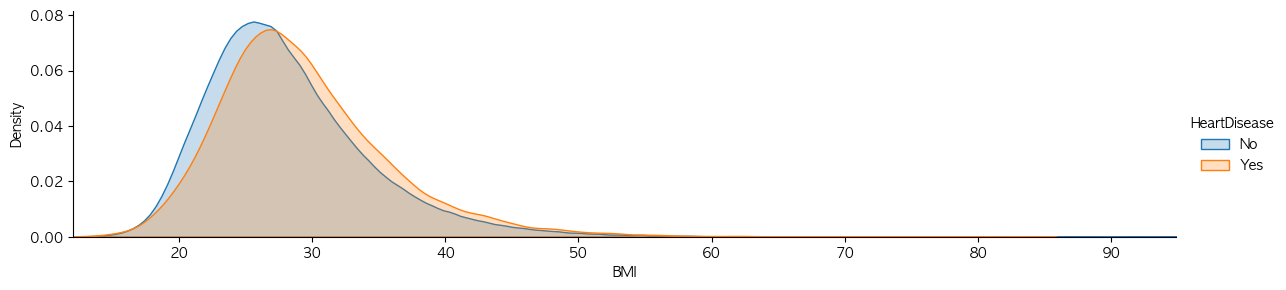

In [117]:
kde('BMI')

- Density : 밀도를 말하며 값이 높을 수록 x값에 가까운 수치가 많이 분포한다는 의미
- 심장질환 보유자 중 BMI의 수치가 약 27인 사람의 수가 가장 많음
- 심장질환 미보유자 중 BMI의 수치가 약 25인 사람의 수가 가장 많음

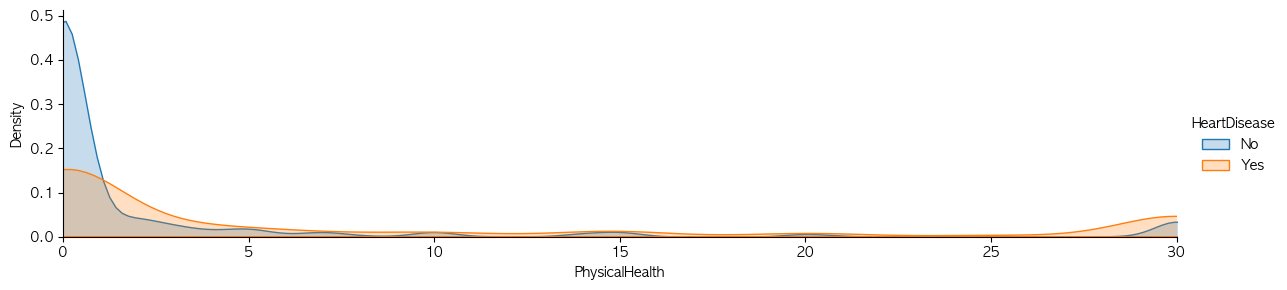

In [146]:
kde('PhysicalHealth')

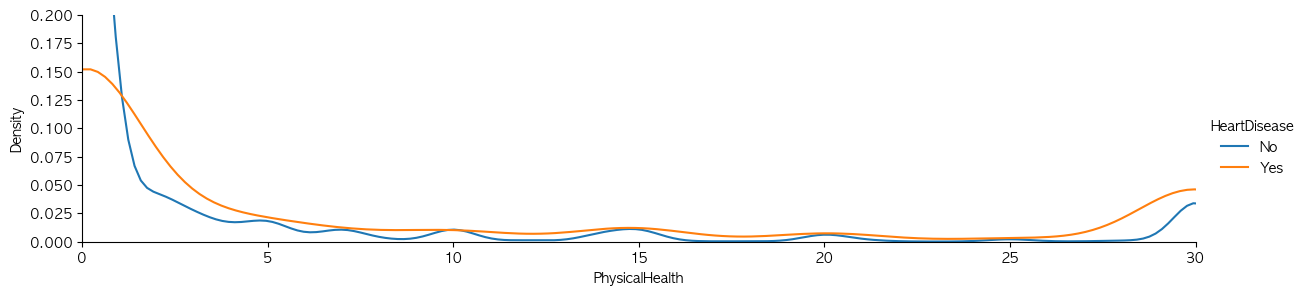

In [127]:
kde('PhysicalHealth')

- PhysicalHealth : 지난 30일 동안 건강이 좋지 않았던 날
- 심장질환 미보유자는 PhysicalHealth 수치가 낮은 경향을 보이는 사람들이 상대적으로 많음
- 심장질환 보유자는 PhysicalHealth 수치가 낮은 경향을 보이는 사람들이 상대적으로 적음
- 특히, 심장질환 보유자 기준으로 PhysicalHealth가 급격히 감소하다가 약 4인 지점에서 완만하게 변하며
- PhysicalHealth가 27인 지점에서 다시 Density가 증가함

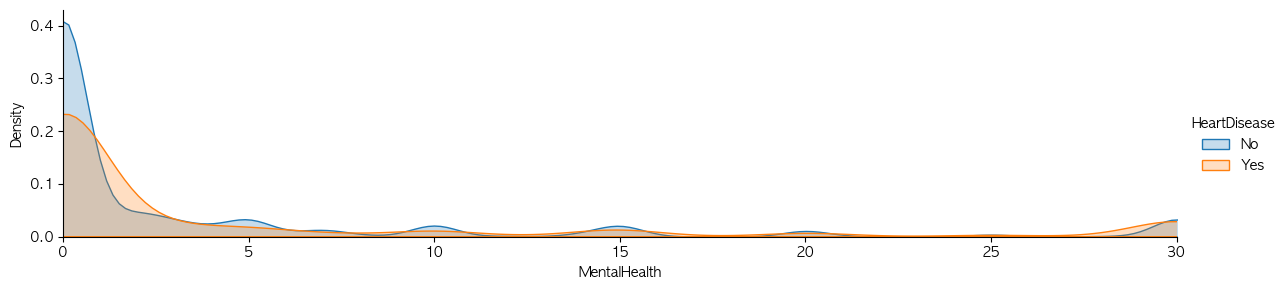

In [145]:
kde('MentalHealth')

- PysicalHealth와 비슷한 모양을 보임
- 그러나 심장질환 보유자를 비교했을 때, Density는 약 2배 정도로 높은 수치를 보임

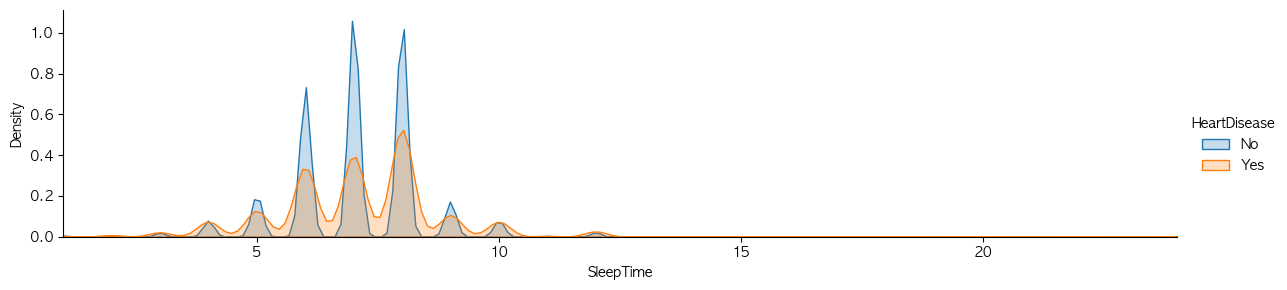

In [140]:
kde('SleepTime')

In [144]:
df['SleepTime'].value_counts()

SleepTime
7     97751
8     97602
6     66721
5     19184
9     16041
10     7796
4      7750
12     2205
3      1992
2       788
1       551
11      415
14      243
16      236
15      189
18      102
13       97
20       64
24       30
17       21
22        9
19        3
23        3
21        2
Name: count, dtype: int64

- 봉우리가 4개 존재함 -> 4개의 그룹으로 나눌 수 있음
- 그룹1 : 5시간 수면 , 그룹2 : 6시간, 그룹3 : 7시간, 그룹4 : 8시간을 수면한다고 가정
- 그룹1 기준, Density차이가 다른 그룹에 비해 좁음 -> 그룹별로 심장질환 발병 확률이 다를 수 있다?
- 다른 그래프에 비해 꼬리가 긺 -> 이상치 존재 가능성 있음
- SleepTime 컬럼의 value를 확인해보니 24와 같은 이상치 존재

In [147]:
# HeartDisease == Yes인 경우만 추출
data_y = df[df['HeartDisease']=='Yes']
data_y

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
10,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes
42,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes
43,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30,15,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6,Yes,No,No
319767,Yes,36.21,Yes,No,No,0,0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8,No,No,No
319781,Yes,37.12,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,7,No,No,No
319786,Yes,33.20,Yes,No,No,0,0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8,Yes,No,No


In [180]:
def pie_chart(feature):
    column_counts = data_y[feature].value_counts()
    
    # 파이 차트 그리기
    plt.figure(figsize=(5, 5))
    plt.pie(column_counts, labels=column_counts.index, autopct='%2.2f%%', shadow=True)
    plt.legend(title=feature, loc='best')
    plt.show()
    

In [151]:
data_y['Smoking'].value_counts()

Smoking
Yes    16037
No     11336
Name: count, dtype: int64

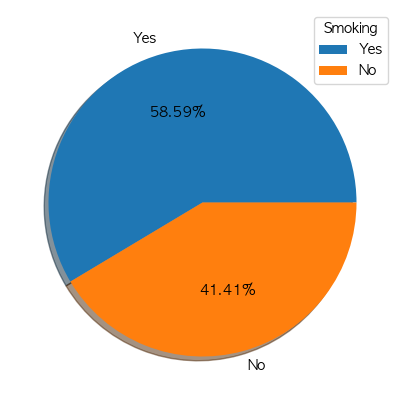

In [181]:
pie_chart('Smoking')

In [153]:
data_y['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     26232
Yes     1141
Name: count, dtype: int64

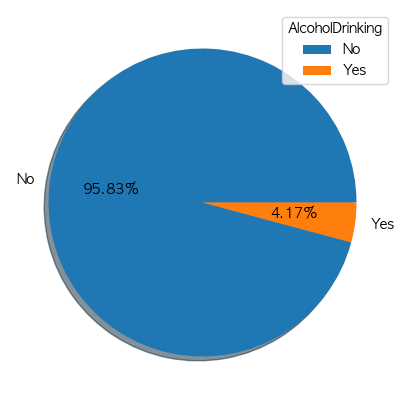

In [182]:
pie_chart('AlcoholDrinking')

In [154]:
data_y['Stroke'].value_counts()

Stroke
No     22984
Yes     4389
Name: count, dtype: int64

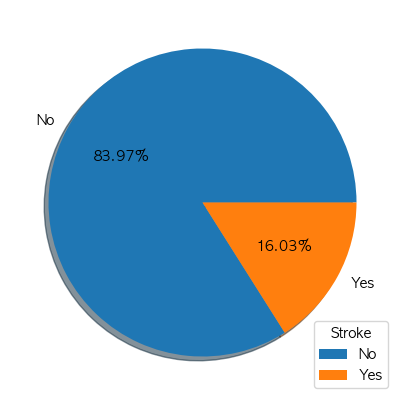

In [155]:
pie_chart('Stroke')

In [156]:
data_y['DiffWalking'].value_counts()

DiffWalking
No     17345
Yes    10028
Name: count, dtype: int64

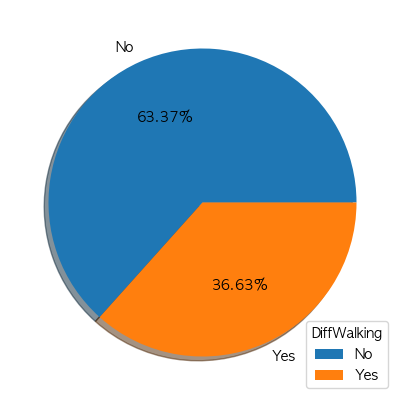

In [157]:
pie_chart('DiffWalking')

In [158]:
data_y['Sex'].value_counts()

Sex
Male      16139
Female    11234
Name: count, dtype: int64

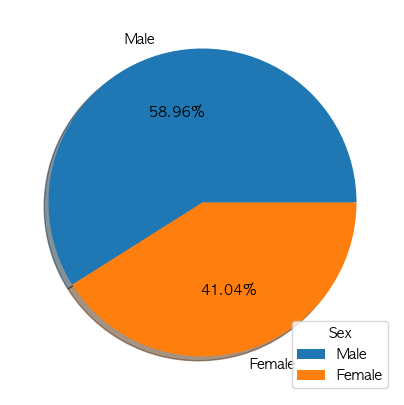

In [159]:
pie_chart('Sex')

In [161]:
data_y['AgeCategory'].value_counts()

AgeCategory
80 or older    5449
70-74          4847
65-69          4101
75-79          4049
60-64          3327
55-59          2202
50-54          1383
45-49           744
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: count, dtype: int64

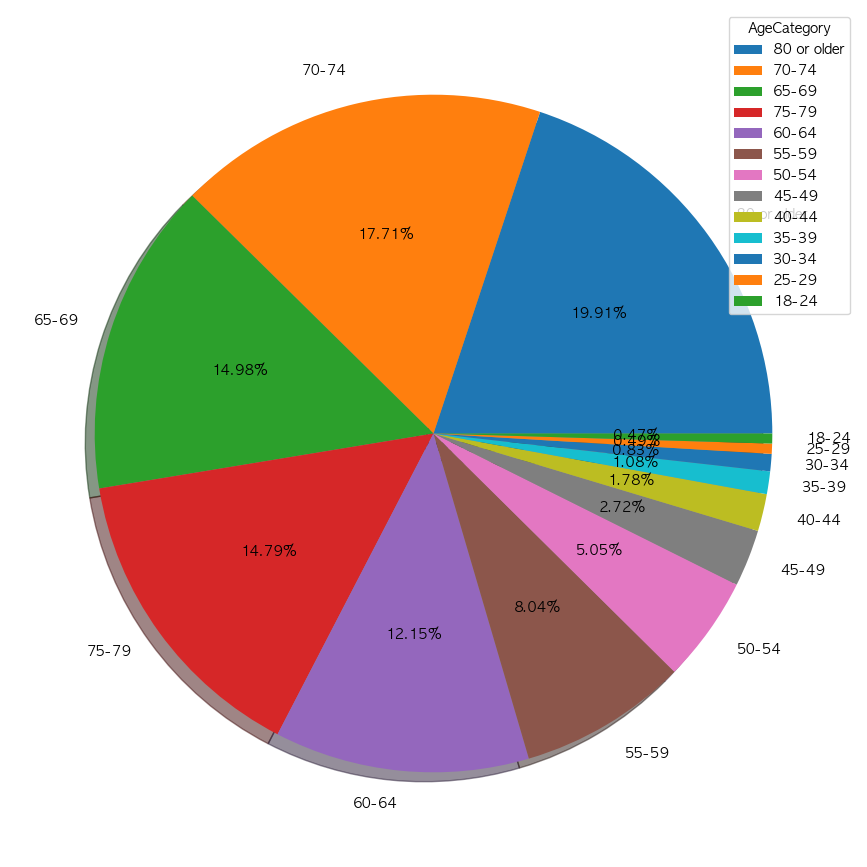

In [173]:
pie_chart('AgeCategory')

In [183]:
data_y['Race'].value_counts()

Race
White                             22507
Black                              1729
Hispanic                           1443
Other                               886
American Indian/Alaskan Native      542
Asian                               266
Name: count, dtype: int64

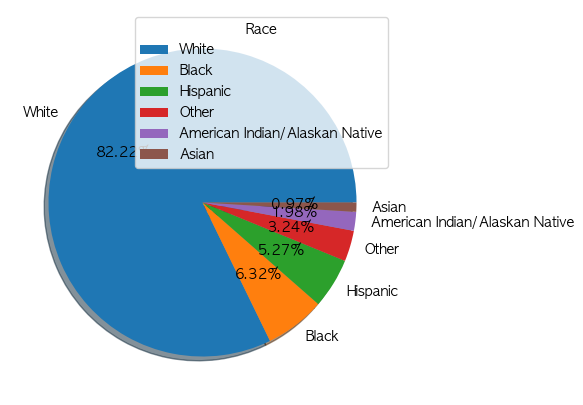

In [184]:
pie_chart('Race')

In [185]:
data_y['Diabetic'].value_counts()

Diabetic
No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
Name: count, dtype: int64

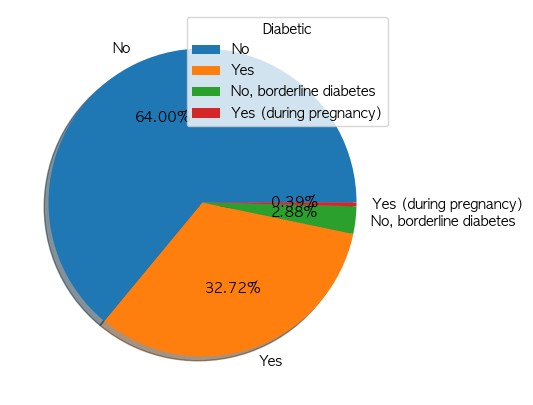

In [186]:
pie_chart('Diabetic')

In [190]:
data_y['PhysicalActivity'].value_counts()

PhysicalActivity
Yes    17489
No      9884
Name: count, dtype: int64

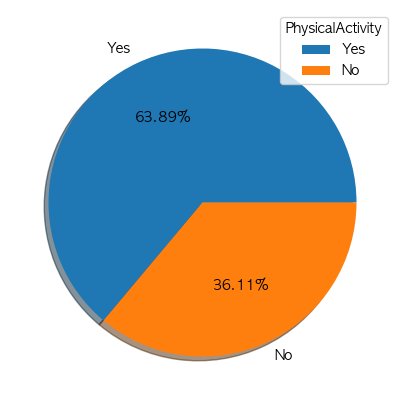

In [191]:
pie_chart('PhysicalActivity')

## 데이터 스플릿

In [39]:
# feature / target 분리
X = df.drop(columns =['HeartDisease'], axis = 1)
y = df['HeartDisease']

In [209]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [195]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

## 인코딩 및 스케일링

In [46]:
# 범주형 데이터 인코딩

# 'object' 데이터 타입인 열만 선택
categorical_columns = X.select_dtypes(include=['object'])
# 각 'object' 열에 대해 원핫 인코딩 수행하고 결과를 리스트에 저장
encoded_columns = []
for column in categorical_columns:
    encoded_data = one.fit_transform(X[[column]])
    # 2차원 배열로 변환 후 데이터프레임 생성
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=one.get_feature_names_out([column]))
    encoded_columns.append(encoded_df)

# 모든 열을 수직으로 결합
X_encoded = pd.concat(encoded_columns, axis=1)

# 수치형 데이터 StandardScaler 진행
# X_encoded[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']] = sc.fit_transform(X[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])

In [47]:
X_encoded

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
319791,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
319792,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
319793,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [48]:
# target 원핫인코딩 진행
y_encoded = np.array(y)
y_encoded = y_encoded.reshape(-1, 1)
y_encoded = one.fit_transform(y_encoded)
y_encoded = pd.DataFrame(y_encoded.toarray(), columns=one.get_feature_names_out(['HeartDiesase']))
y_encoded

,HeartDiesase_No,HeartDiesase_Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
319790,0.0,1.0
319791,1.0,0.0
319792,1.0,0.0
319793,1.0,0.0


- 0은 심장질환 무, 1은 심장질환 유. 그러므로 HeartDiesase_No컬럼 제거

In [49]:
y_encoded.drop('HeartDiesase_No', axis=1, inplace=True)
y_encoded

,HeartDiesase_Yes
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
319790,1.0
319791,0.0
319792,0.0
319793,0.0


In [50]:
# 범주형 변수만 인코딩된 데이터프레임에 수치형 데이터 추가
X_encoded[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']] = X[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

In [51]:
X_encoded

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,16.60,3,30,5
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,20.34,0,0,7
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,26.58,20,30,8
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,24.21,0,0,6
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,23.71,28,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,27.41,7,0,6
319791,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,29.84,0,0,5
319792,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,24.24,0,0,6
319793,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,32.81,0,0,12


In [60]:
# 수치형 데이터 StandardScaler 진행
X_encoded[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']] = sc.fit_transform(X_encoded[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.25, random_state = 42)

In [269]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training target:', y_train.shape)
print('Shape of testing target:', y_test.shape)

Shape of training feature: (239846, 50)
Shape of testing feature: (79949, 50)
Shape of training target: (239846, 1)
Shape of testing target: (79949, 1)


# 머신러닝
###  Light GBM

In [64]:
import lightgbm as lgb

In [234]:
# params = {
#     'objective': 'binary',  # 이진 분류 문제인 경우 'binary'로 설정
#     'metric': 'binary_logloss',  # 평가 지표
#     'boosting_type': 'gbdt',  # 부스팅 타입: Gradient Boosting Decision Tree
#     'num_leaves': 31,  # 각 트리가 가질 수 있는 최대 잎 노드 수
#     'max_depth' : 6,
#     'learning_rate': 0.1,  # 학습률 (일반적으로 작은 값으로 설정)
#     'n_estimators': 100,  # 트리의 개수 (충분한 트리 개수로 설정)
#     'random_state': 62  # 랜덤 시드
# }

# # LightGBM 모델 초기화
# model = lgb.LGBMClassifier(**params)

# # 모델 학습
# model.fit(X_train, y_train)

# # 테스트 데이터에 대한 예측
# y_pred = model.predict(X_test)

[LightGBM] [Fatal] Do not support special JSON characters in feature name.


LightGBMError: Do not support special JSON characters in feature name.

In [270]:
# "Do not support special JSON characters in feature name" 오류 발생으로 인한 조치
# 실행후 split 재실행
import re
X_encoded = X_encoded.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [312]:
params = {
    'objective': 'binary',  # 이진 분류 문제인 경우 'binary'로 설정
    'metric': 'binary_logloss',  # 평가 지표
    'boosting_type': 'gbdt',  # 부스팅 타입: Gradient Boosting Decision Tree
    'num_leaves': 31,  # 각 트리가 가질 수 있는 최대 잎 노드 수
    'max_depth' : 6,
    'learning_rate': 0.1,  # 학습률 (일반적으로 작은 값으로 설정)
    'n_estimators': 100,  # 트리의 개수 (충분한 트리 개수로 설정)
    'random_state': 62  # 랜덤 시드
}

# LightGBM 모델 초기화
model = lgb.LGBMClassifier(**params)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)


accuracy_lgb = accuracy_score(y_test, y_pred)
precision_lgb = precision_score(y_test, y_pred)
recall_lgb = recall_score(y_test, y_pred)
f1_lgb = f1_score(y_test, y_pred)
roc_auc_lgb = roc_auc_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy_lgb:.4f}')
print(f'Precision: {precision_lgb:.4f}')
print(f'Recall: {recall_lgb:.4f}')
print(f'F1 Score: {f1_lgb:.4f}')
print(f'roc auc Score: {roc_auc_lgb:.4f}')

Test Accuracy: 0.9146
Precision: 0.5580
Recall: 0.0811
F1 Score: 0.1416
roc auc Score: 0.5375


## DecisionTree

In [272]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=31, random_state=62)

In [313]:
# 모델 훈련
dt.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt= f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
print(f'roc auc Score: {roc_auc_dt:.4f}')

Accuracy: 0.9136
Precision: 0.5466
Recall: 0.0312
F1 Score: 0.0591
roc auc Score: 0.5144


## KNN

In [277]:
# 필요한 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [314]:
# 모델 훈련
knn.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'roc auc Score: {roc_auc_knn:.4f}')

Accuracy: 0.9051
Precision: 0.3617
Recall: 0.1204
F1 Score: 0.1806
roc auc Score: 0.5501


## LogisticRegression

In [175]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 62,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [315]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=62)

In [316]:
# 모델 훈련
lr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
roc_auc_score_lr = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_lr:.4f}')
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')
print(f'F1 Score: {f1_lr:.4f}')
print(f'roc auc Score: {roc_auc_score_lr:.4f}')

Accuracy: 0.9142
Precision: 0.5338
Recall: 0.0999
F1 Score: 0.1683
roc auc Score: 0.5458


## RandomForest

In [317]:
# 필요한 라이브러리 불러오기
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=62, max_depth=6)

In [319]:
# 모델 훈련
rfc.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)
roc_auc_rfc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_rfc:.4f}')
print(f'Precision: {precision_rfc:.4f}')
print(f'Recall: {recall_rfc:.4f}')
print(f'F1 Score: {f1_rfc:.4f}')
print(f'roc auc Score: {roc_auc_rfc:.4f}')

Accuracy: 0.9141
Precision: 0.7251
Recall: 0.0179
F1 Score: 0.0349
roc auc Score: 0.5086


## XGB

In [320]:
import xgboost as xgb
xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=2, random_state=62, max_depth=6) # 양성, 음성을 맞춰야 하기 때문에 num_class = 2

In [321]:
# 모델 훈련
xgb.fit(X_train, y_train)


# 테스트 데이터로 예측
y_pred = xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred)


print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1 Score: {f1_xgb:.4f}')
print(f'roc_auc Score: {roc_auc_xgb:.4f}')

Accuracy: 0.9143
Precision: 0.5373
Recall: 0.0986
F1 Score: 0.1667
roc_auc Score: 0.5453


In [247]:
def dataframe(y):
    vis={'Algorithm':['LightGBM', 'LogisticRegression', 'KNNClassification', 'DecisionTreeClassifier', 
                      'XGBoost', 'RandomForestClassifier'],
     'Accuracy':y
     
    } 
    accuracy=pd.DataFrame(vis)
    return accuracy

In [248]:
dataframe([accuracy_lgb, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_rfc])

,Algorithm,Accuracy
0,LightGBM,0.892785
1,LogisticRegression,0.770708
2,KNNClassification,0.863034
3,DecisionTreeClassifier,0.749513
4,XGBoost,0.918905
5,RandomForestClassifier,0.773020


In [249]:
data = dataframe([accuracy_lgb, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_rfc])

<Axes: title={'center': 'Testing Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

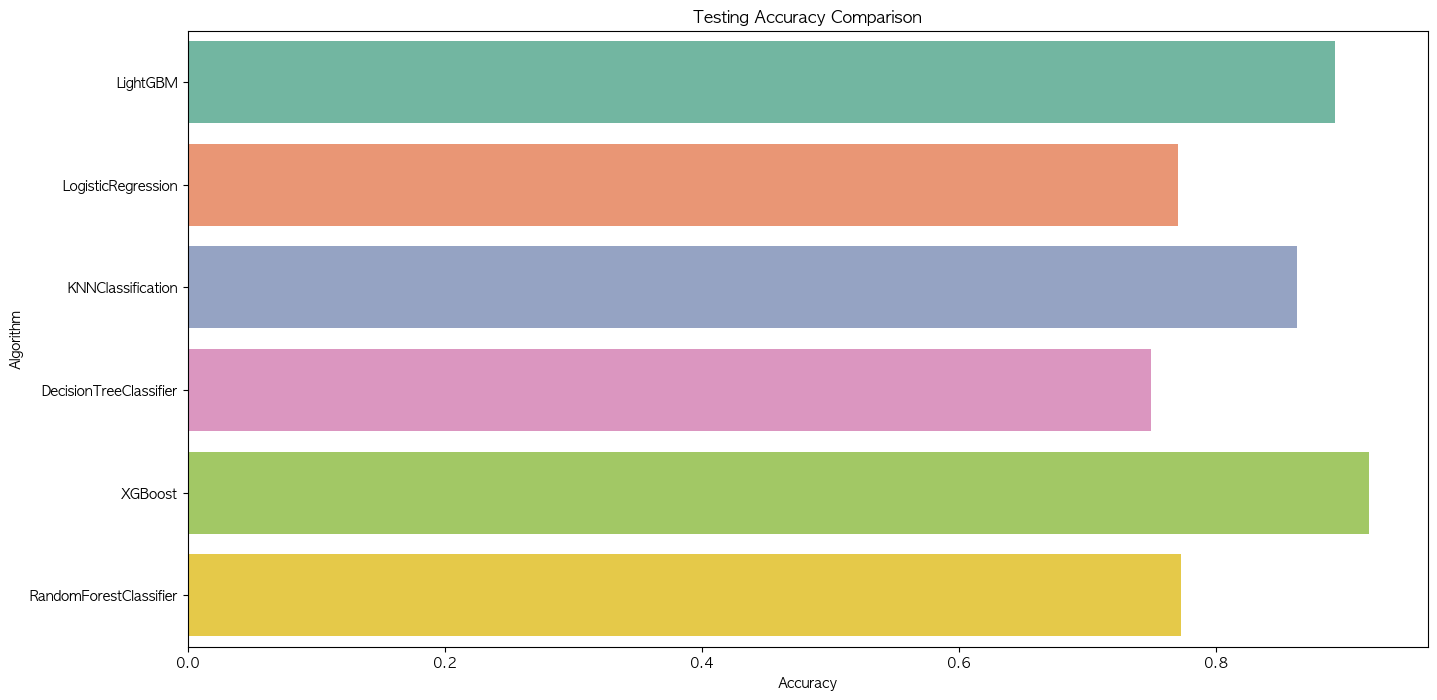

In [250]:
plt.figure(figsize=(16,8))

plt.title('Testing Accuracy Comparison')
sns.barplot(y="Algorithm",x='Accuracy',data=data,palette='Set2')

## 오버샘플링 SMOTE

In [141]:
from imblearn.over_sampling import SMOTE

In [143]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # sampling_strategy를 조정하여 오버샘플링 비율을 설정할 수 있습니다.
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

In [147]:
X_resampled

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,-1.844750,-0.046751,3.281069,-1.460354
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-1.256338,-0.424070,-0.490039,-0.067601
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,-0.274603,2.091388,3.281069,0.628776
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.647473,-0.424070,-0.490039,-0.763977
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.726138,3.097572,-0.490039,0.628776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.760843,-0.424070,-0.490039,0.628776
584840,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.258560,-0.424070,-0.490039,-0.067601
584841,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.300492,2.091388,-0.490039,-0.075816
584842,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,-0.792236,-0.315998,0.947018,-1.757817


In [146]:
y_resampled

,HeartDiesase_Yes
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
584839,1.0
584840,1.0
584841,1.0
584842,1.0


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 42)

## LightGBM

In [169]:
params

{'objective': 'binary',
 'metric': 'binary_logloss',
 'boosting_type': 'gbdt',
 'num_leaves': 31,
 'max_depth': 6,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 62}

In [183]:
# LightGBM 모델 초기화
model = lgb.LGBMClassifier(**params)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)


accuracy_lgb = accuracy_score(y_test, y_pred)
precision_lgb = precision_score(y_test, y_pred)
recall_lgb = recall_score(y_test, y_pred)
f1_lgb = f1_score(y_test, y_pred)
roc_auc_lgb = roc_auc_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy_lgb:.4f}')
print(f'Precision: {precision_lgb:.4f}')
print(f'Recall: {recall_lgb:.4f}')
print(f'F1 Score: {f1_lgb:.4f}')
print(f'roc auc Score: {roc_auc_lgb:.4f}')

Test Accuracy: 0.8928
Precision: 0.8945
Recall: 0.8906
F1 Score: 0.8925
roc auc Score: 0.8928


## DecisionTree

In [174]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 31,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 62,
 'splitter': 'best'}

In [194]:
# 모델 훈련
dt.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt= f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
print(f'roc auc Score: {roc_auc_dt:.4f}')

Accuracy: 0.7495
Precision: 0.7532
Recall: 0.7423
F1 Score: 0.7477
roc auc Score: 0.7495


## KNN

In [173]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [151]:
# 모델 훈련
knn.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
roc_auc_score_knn = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'roc auc Score: {roc_auc_score_knn:.4f}')

Accuracy: 0.8630
Precision: 0.8102
Recall: 0.9481
F1 Score: 0.8738
roc auc Score: 0.8630


## LogisticRegression

In [170]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 62,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [191]:
# 모델 훈련
lr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_lr:.4f}')
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')
print(f'F1 Score: {f1_lr:.4f}')
print(f'roc auc Score: {roc_auc_lr:.4f}')

Accuracy: 0.7707
Precision: 0.7571
Recall: 0.7972
F1 Score: 0.7766
roc auc Score: 0.7707


## RandomForest

In [171]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 62,
 'verbose': 0,
 'warm_start': False}

In [196]:
# 모델 훈련
rfc.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)
roc_auc_rfc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy_rfc:.4f}')
print(f'Precision: {precision_rfc:.4f}')
print(f'Recall: {recall_rfc:.4f}')
print(f'F1 Score: {f1_rfc:.4f}')
print(f'roc auc Score: {roc_auc_rfc:.4f}')

Accuracy: 0.7730
Precision: 0.7875
Recall: 0.7479
F1 Score: 0.7671
roc auc Score: 0.7730


## XGB

In [177]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=2,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [154]:
# 모델 훈련
xgb.fit(X_train, y_train)


# 테스트 데이터로 예측
y_pred = xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred)


print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'Precision: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1 Score: {f1_xgb:.4f}')
print(f'roc_auc Score: {roc_auc_xgb:.4f}')

Accuracy: 0.9189
Precision: 0.9449
Recall: 0.8897
F1 Score: 0.9165
roc_auc Score: 0.9189


In [157]:
dataframe([accuracy_lgb, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_rfc])

,Algorithm,Accuracy
0,LightGBM,0.892785
1,LogisticRegression,0.770708
2,KNNClassification,0.863034
3,DecisionTreeClassifier,0.749513
4,XGBClassifier,0.918905
5,RandomForestClassifier,0.773020


In [251]:
data2 = dataframe([accuracy_lgb, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_rfc])

<Axes: title={'center': 'Testing Accuracy Comparison - SMOTE'}, xlabel='Accuracy', ylabel='Algorithm'>

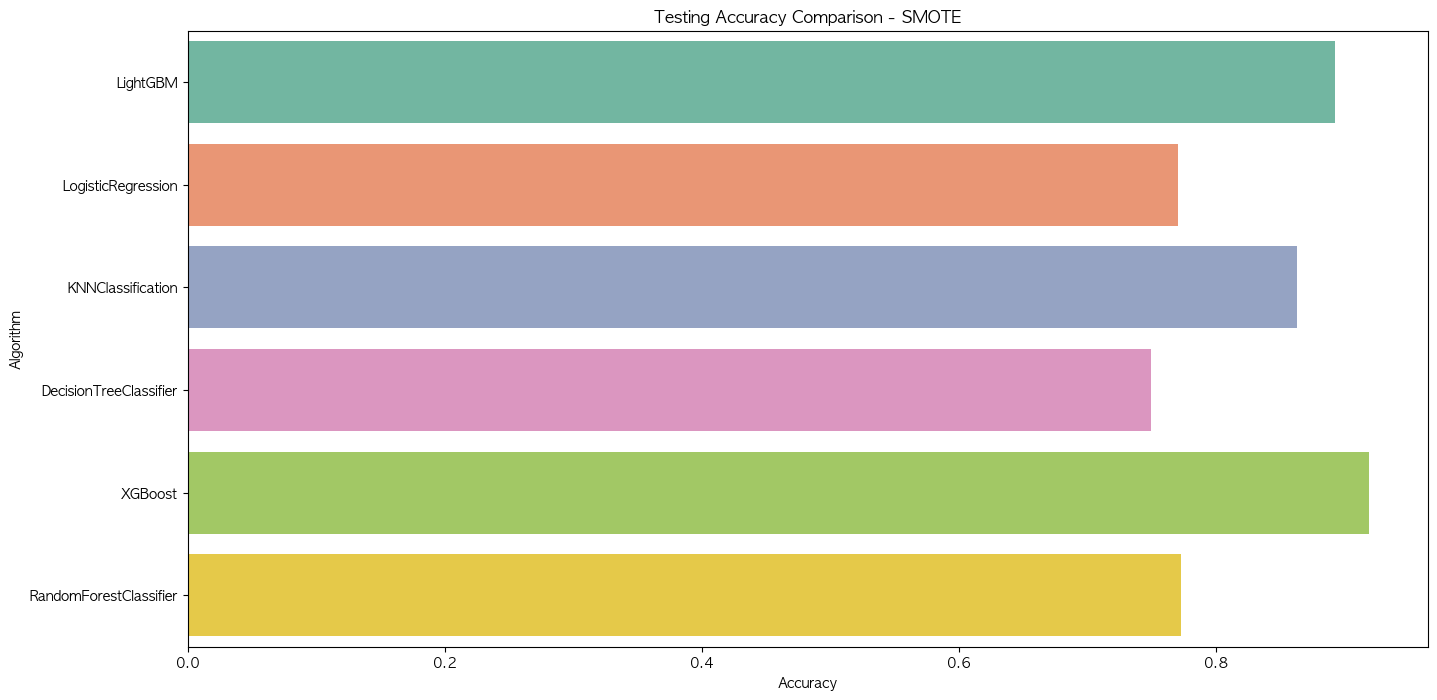

In [252]:
plt.figure(figsize=(16,8))

plt.title('Testing Accuracy Comparison - SMOTE')
sns.barplot(y="Algorithm",x='Accuracy',data=data2,palette='Set2')

In [255]:
Smote1 = dataframe([accuracy_lgb, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_rfc])
Smote2 = dataframe([precision_lgb, precision_lr, precision_knn, precision_dt, precision_xgb, precision_rfc])
Smote3 = dataframe([recall_lgb, recall_lr, recall_knn, recall_dt, recall_xgb, recall_rfc])
Smote4 = dataframe([f1_lgb, f1_lr, f1_knn, f1_dt, f1_xgb, f1_rfc])
Smote5 = dataframe([roc_auc_lgb, roc_auc_lr, roc_auc_score_knn, roc_auc_dt, roc_auc_xgb, roc_auc_rfc])

In [256]:
Smote = pd.concat([Smote1, Smote2, Smote3, Smote4, Smote5], axis=1)

In [257]:
Smote 

,Algorithm,Accuracy,Algorithm,Accuracy,Algorithm,Accuracy,Algorithm,Accuracy,Algorithm,Accuracy
0,LightGBM,0.892785,LightGBM,0.894503,LightGBM,0.890587,LightGBM,0.892540,LightGBM,0.892785
1,LogisticRegression,0.770708,LogisticRegression,0.757054,LogisticRegression,0.797207,LogisticRegression,0.776612,LogisticRegression,0.770710
2,KNNClassification,0.863034,KNNClassification,0.810212,KNNClassification,0.948139,KNNClassification,0.873766,KNNClassification,0.863041
3,DecisionTreeClassifier,0.749513,DecisionTreeClassifier,0.753154,DecisionTreeClassifier,0.742254,DecisionTreeClassifier,0.747664,DecisionTreeClassifier,0.749512
4,XGBoost,0.918905,XGBoost,0.944866,XGBoost,0.889711,XGBoost,0.916459,XGBoost,0.918902
5,RandomForestClassifier,0.773020,RandomForestClassifier,0.787451,RandomForestClassifier,0.747862,RandomForestClassifier,0.767146,RandomForestClassifier,0.773018


In [258]:
Smote = Smote.set_axis(['Algorithm', 'Accuracy', 
                'Algorithm', 'Precision',
               'Algorithm', 'Recall',
               'Algorithm', 'F1-score',
               'Algorithm', 'AUC'], axis=1)

In [259]:
Smote = Smote.loc[:, ~Smote.columns.duplicated()]

In [260]:
Smote

,Algorithm,Accuracy,Precision,Recall,F1-score,AUC
0,LightGBM,0.892785,0.894503,0.890587,0.892540,0.892785
1,LogisticRegression,0.770708,0.757054,0.797207,0.776612,0.770710
2,KNNClassification,0.863034,0.810212,0.948139,0.873766,0.863041
3,DecisionTreeClassifier,0.749513,0.753154,0.742254,0.747664,0.749512
4,XGBoost,0.918905,0.944866,0.889711,0.916459,0.918902
5,RandomForestClassifier,0.773020,0.787451,0.747862,0.767146,0.773018


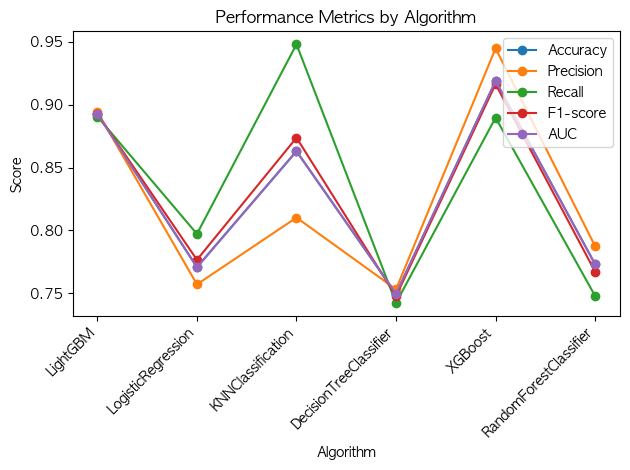

In [334]:
# 컬럼 이름을 xticks로 설정
plt.xticks(range(len(Smote)), Smote['Algorithm'], rotation=45, ha='right')

# 각 컬럼별 값을 선 그래프로 그리기
plt.plot(Smote['Accuracy'], label='Accuracy', marker='o')
plt.plot(Smote['Precision'], label='Precision', marker='o')
plt.plot(Smote['Recall'], label='Recall', marker='o')
plt.plot(Smote['F1-score'], label='F1-score', marker='o')
plt.plot(Smote['AUC'], label='AUC', marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('Performance Metrics by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Score')

# y축 범위 설정 (0에서 1로 설정 예시)
# plt.ylim(0, 1)

# 범례 추가
plt.legend(loc='upper right')

# 그래프 표시
plt.tight_layout()
plt.show()

In [323]:
noSmote1 = dataframe([accuracy_lgb, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_xgb, accuracy_rfc])
noSmote2 = dataframe([precision_lgb, precision_lr, precision_knn, precision_dt, precision_xgb, precision_rfc])
noSmote3 = dataframe([recall_lgb, recall_lr, recall_knn, recall_dt, recall_xgb, recall_rfc])
noSmote4 = dataframe([f1_lgb, f1_lr, f1_knn, f1_dt, f1_xgb, f1_rfc])
noSmote5 = dataframe([roc_auc_lgb, roc_auc_lr, roc_auc_knn, roc_auc_dt, roc_auc_xgb, roc_auc_rfc])

In [324]:
noSmote = pd.concat([noSmote1, noSmote2, noSmote3, noSmote4, noSmote5], axis=1)

In [325]:
noSmote = noSmote.set_axis(['Algorithm', 'Accuracy', 
                'Algorithm', 'Precision',
               'Algorithm', 'Recall',
               'Algorithm', 'F1-score',
               'Algorithm', 'AUC'], axis=1)

In [326]:
noSmote = noSmote.loc[:, ~noSmote.columns.duplicated()]

In [327]:
noSmote

,Algorithm,Accuracy,Precision,Recall,F1-score,AUC
0,LightGBM,0.914596,0.557978,0.081066,0.141564,0.537478
1,LogisticRegression,0.914233,0.533846,0.099928,0.168344,0.770710
2,KNNClassification,0.905140,0.361748,0.120374,0.180640,0.550085
3,DecisionTreeClassifier,0.913595,0.546599,0.031246,0.059112,0.514390
4,XGBoost,0.914320,0.537255,0.098632,0.166667,0.545275
5,RandomForestClassifier,0.914095,0.725146,0.017855,0.034851,0.508605


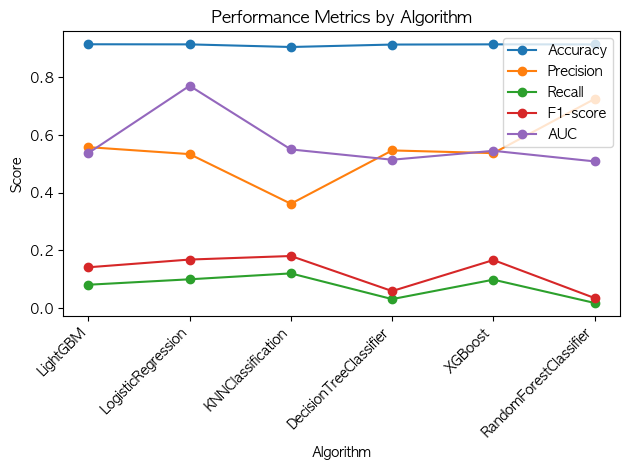

In [530]:
# 컬럼 이름을 xticks로 설정
plt.xticks(range(len(Smote)), noSmote['Algorithm'], rotation=45, ha='right')

# 각 컬럼별 값을 선 그래프로 그리기
plt.plot(noSmote['Accuracy'], label='Accuracy', marker='o')
plt.plot(noSmote['Precision'], label='Precision', marker='o')
plt.plot(noSmote['Recall'], label='Recall', marker='o')
plt.plot(noSmote['F1-score'], label='F1-score', marker='o')
plt.plot(noSmote['AUC'], label='AUC', marker='o')

# 그래프 제목과 축 레이블 설정
plt.title('Performance Metrics by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Score')

# 범례 추가
plt.legend(loc='upper right')

# 그래프 표시
plt.tight_layout()
plt.show()

In [458]:
a=noSmote.loc[4:4]

In [459]:
b=Smote.loc[4:4]

In [466]:
c = pd.concat([a,b],axis=0)

In [510]:
c = c.reset_index(drop=True)

In [511]:
c

,Algorithm,Accuracy,Precision,Recall,F1-score,AUC
0,XGBoost,0.914320,0.537255,0.098632,0.166667,0.545275
1,XGBoost,0.918905,0.944866,0.889711,0.916459,0.918902


In [517]:
d = c.transpose()

In [518]:
d

,0,1
Algorithm,XGBoost,XGBoost
Accuracy,0.91432,0.918905
Precision,0.537255,0.944866
Recall,0.098632,0.889711
F1-score,0.166667,0.916459
AUC,0.545275,0.918902


In [551]:
d = d.loc['Accuracy':]

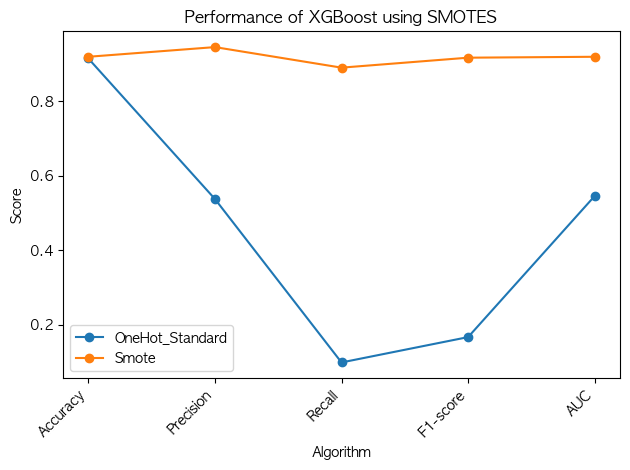

In [557]:
# 컬럼 이름을 xticks로 설정
plt.xticks(range(len(d)), d.index, rotation=45, ha='right')

plt.plot(d[0], label='OneHot_Standard', marker='o')
plt.plot(d[1], label='Smote', marker='o')
# 그래프 제목과 축 레이블 설정
plt.title('Performance of XGBoost using SMOTES')
plt.xlabel('Algorithm')
plt.ylabel('Score')

# 범례 추가
plt.legend(loc='best')

# 그래프 표시
plt.tight_layout()
plt.show()